# Comparing Census Data between California and Florida

##### The purpose of this exercise is to practice using census data. Here I compare data from California and Florida to determine if there are any significant differences between these two states. 

##### The first step is to load in the excel files using Pandas (I also needed the xlrd package). The census data is divided into different sections, each on a different excel sheet. To load all the sheets in, I needed to set sheet_name=None. As well, I don't want to alter the original formatting of the data and so I need to skip certain rows (headers that span multiple rows) to extract the data I need. There are still subheadings present in the dataframe after this step - but that'll be taken care of at the appropriate analysis stage. I'm going to be looking at the age demographic data first.

In [3]:
import pandas as pd
import numpy as np

In [4]:
cali_data = pd.read_excel("ACSprofile_California.xls", sheet_name=None, skiprows=[0,1,2,3,5,6])
flor_data = pd.read_excel("ACSprofile_Florida.xls", sheet_name=None, skiprows=[0,1,2,3,5,6])

In [26]:
cali_dem = cali_data['Demographic'].rename(columns={"Unnamed: 0": "Characteristic", "Number": "Cali Number", "Number.1": "USA Number", "MOE.1": "USA MOE","Pct.1": "US Pct"})
flor_dem = flor_data['Demographic'].rename(columns={"Unnamed: 0": "Characteristic", "Number": "Flor Number", "Number.1": "USA Number", "MOE.1": "USA MOE","Pct.1": "US Pct"})

In [27]:
cali_dem.head()

,Characteristic,Cali Number,MOE,Pct,USA Number,USA MOE,US Pct
0,Total population,39283496.0,NaN,NaN,324697792.0,NaN,NaN
1,Under 5 years,2451528.0,+/- 826,6.2,19767670.0,+/- 5192,6.1
2,5 to 9 years,2468226.0,+/- 9095,6.3,20157477.0,+/- 25676,6.2
3,10 to 14 years,2575463.0,+/- 9054,6.6,20927278.0,+/- 25287,6.4
4,15 to 19 years,2565170.0,+/- 1436,6.5,21208186.0,+/- 8864,6.5


In [28]:
flor_dem.head()

,Characteristic,Flor Number,MOE,Pct,USA Number,USA MOE,US Pct
0,Total population,20901636.0,NaN,NaN,324697792.0,NaN,NaN
1,Under 5 years,1128214.0,+/- 1171,5.4,19767670.0,+/- 5192,6.1
2,5 to 9 years,1132263.0,+/- 6817,5.4,20157477.0,+/- 25676,6.2
3,10 to 14 years,1197885.0,+/- 6733,5.7,20927278.0,+/- 25287,6.4
4,15 to 19 years,1206046.0,+/- 1813,5.8,21208186.0,+/- 8864,6.5


#### Question 1: How do the age demographics between California and Florida compare to each other and to the US overall?

##### My hypothesis is that there will be a greater number of people who are older than 40 in Florida compared to California because Florida is a popular retirement location. California is known for Silicon Valley, which attracts younger people in tech and business. I predict that these differences will be significant compared to the whole US population. Therefore, compared to the total US population, I predict that there will be a greater number of relatively older people in Florida (age 40+) while California will have a greater number of younger folk.

##### To answer this question, I need the percentages for each of the age ranges. The error in the percentages is really small - I will be ignoring this as I am interested in large differences (e.g. >3%) between the Florida and California data (although a more rigorous analysis would consider the error as well to determine significant differences). 

##### I want to plot the percents for each age range as bar plots for California and Florida. On top of that, I want a line graph showing the US population data.

##### First I am going to drop any rows with NAs in them:

In [30]:
cali_dem = cali_dem.dropna(how="any")
flor_dem = flor_dem.dropna(how="any")

##### Then I am going to select the rows I am interested in. For this, there are two functions that can be used: loc and iloc. loc is used when the indicies are not an integer, it is LABEL-BASED. iloc is INTEGER-BASED.

##### loc is used along with a condition - example: data.loc[data.age >= 15]. It can also be used with a range of indices - example: data.loc[1:3]

##### Since I removed some rows with headings, it's better to use iloc to make sure I extract the data I want. Also, pick out the characteristic, the Pcts and the US Pcts.

In [54]:
cali_ages = cali_dem.iloc[0:13]
flor_ages = flor_dem.iloc[0:13]

In [55]:
age_ranges = cali_ages["Characteristic"] #these are the same between California and Florida

In [63]:
cali_pct = cali_ages["Pct"]
flor_pct = flor_ages["Pct"]
us_pct = flor_ages["US Pct"] #note that we could have taken these from either dataset

##### Double check that the percentages sum to roughly 100% - it might not be exactly 100% due to rounding errors.

In [61]:
cali_pct.sum()

100.09999999999998

In [62]:
flor_pct.sum()

99.89999999999999

##### Plotting the results:

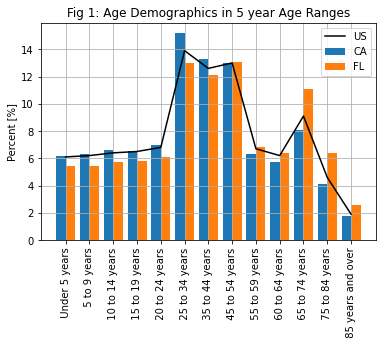

In [86]:
import matplotlib.pyplot as plt

width = 0.4
ind = np.arange(len(age_ranges))
plt.bar(ind, cali_pct, width, label="CA")
plt.bar(ind + width, flor_pct, width, label="FL")
plt.plot(ind + width/2, us_pct, color="black", label="US")
plt.grid()
plt.xticks(ind + width/2, age_ranges, rotation='vertical')
plt.ylabel("Percent [%]")
plt.legend(loc="best")
plt.title("Fig 1: Age Demographics in 5 year Age Ranges")
plt.show()

##### The above plot shows that California has a greater percent of people between the ages of 0 and 44 with the largest difference seen at 25 to 34 years, a difference of approximately 2%. At ages greater than 44, Florida has a greater percent of people compared to California with the greatest difference seen at 65 to 74 years, a difference of roughly 3%. These results confirm the hypothesis that a greater percent of younger people reside in California while a greater percent of people over 45 reside in Florida. It is interesting to note that for people aged 65 to 84, roughly 2-3% more people reside in Florida compared to California. However this difference shrinks for those aged 85 and over. This may be linked to the life expectancy in the US. 

##### California seems to be following the US average for those aged 0 to 24 while Florida appears to be under average for this age range. It is only between 65 and 84 years where the percent of people in Florida is significantly greater than the US average. 

##### Figure 1 shows the percentages of people divided into several age ranges which span 5 years. These divisions are rather fine and so it might be more helpful to look at larger age ranges. This data is present in the original demographic data and we will consider those who are under 18 years of age, those 25 and above and those 65 and above.

##### To locate the rows of interest, we will use loc. 

In [95]:
cali_age_large_range = cali_dem.loc[[17,20,22]]
flor_age_large_range = flor_dem.loc[[17,20,22]]

large_age_divisions = cali_age_large_range["Characteristic"]
cali_age_large_pct = cali_age_large_range["Pct"]
flor_age_large_pct = flor_age_large_range["Pct"]
us_age_large_pct = flor_age_large_range["US Pct"]

##### Plotting the results:

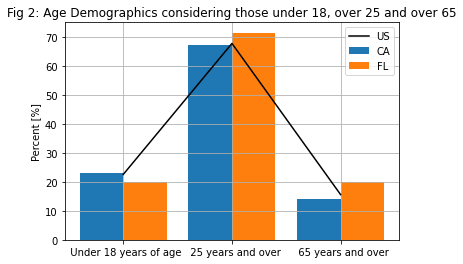

In [98]:
import matplotlib.pyplot as plt

width = 0.4
ind = np.arange(len(large_age_divisions))
plt.bar(ind, cali_age_large_pct, width, label="CA")
plt.bar(ind + width, flor_age_large_pct, width, label="FL")
plt.plot(ind + width/2, us_age_large_pct, color="black", label="US")
plt.grid()
plt.xticks(ind + width/2, large_age_divisions)
plt.ylabel("Percent [%]")
plt.legend(loc="best")
plt.title("Fig 2: Age Demographics considering those under 18, over 25 and over 65")
plt.show()

##### Based on Figure 2, we see again that California has a younger population while Florida appears to have more people aged 25 and up which includes those 65 and up. 

### Question 2: How do the incomes differ between these two states?

In [33]:
cali_economic = cali_data['Economic'].rename(columns={"Unnamed: 0": "Characteristic", "Number": "Cali Number", "Number.1": "USA Number", "MOE.1": "USA MOE","Pct.1": "US Pct"})
flor_economic = flor_data['Economic'].rename(columns={"Unnamed: 0": "Characteristic", "Number": "Cali Number", "Number.1": "USA Number", "MOE.1": "USA MOE","Pct.1": "US Pct"})

In [36]:
cali_economic = cali_economic.dropna(how="any")
flor_economic = flor_economic.dropna(how="any")

In [37]:
cali_income = cali_economic.iloc[0:10]
flor_income = flor_economic.iloc[0:10]

In [38]:
income_values = cali_income['Characteristic']
cali_income_pct = cali_income['Pct']
flor_income_pct = flor_income['Pct']
us_income_pct = flor_income['US Pct']

#### Plotting

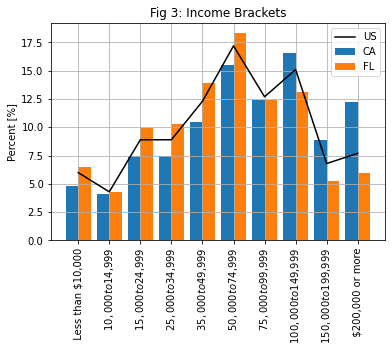

In [39]:
import matplotlib.pyplot as plt

width = 0.4
ind = np.arange(len(income_values))
plt.bar(ind, cali_income_pct, width, label="CA")
plt.bar(ind + width, flor_income_pct, width, label="FL")
plt.plot(ind + width/2, us_income_pct, color="black", label="US")
plt.grid()
plt.xticks(ind + width/2, income_values, rotation='vertical')
plt.ylabel("Percent [%]")
plt.legend(loc="best")
plt.title("Fig 3: Income Brackets")
plt.show()

##### Let's also consider other benefits (social security, retirement income etc.)

In [28]:
cali_benefits = cali_economic[10:16]
flor_benefits = flor_economic[10:16]

In [30]:
benefits = cali_benefits['Characteristic']
cali_benefits_pct = cali_benefits['Pct']
flor_benefits_pct = flor_benefits['Pct']
us_benefits_pct = flor_benefits['US Pct']

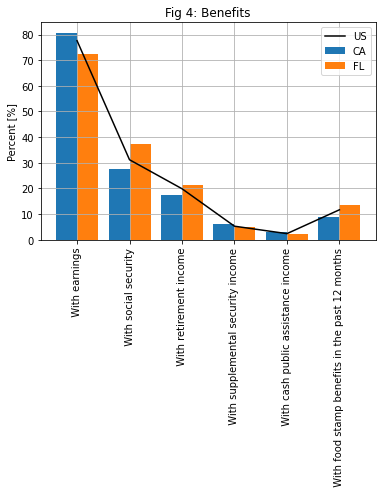

In [31]:
import matplotlib.pyplot as plt

width = 0.4
ind = np.arange(len(benefits))
plt.bar(ind, cali_benefits_pct, width, label="CA")
plt.bar(ind + width, flor_benefits_pct, width, label="FL")
plt.plot(ind + width/2, us_benefits_pct, color="black", label="US")
plt.grid()
plt.xticks(ind + width/2, benefits, rotation='vertical')
plt.ylabel("Percent [%]")
plt.legend(loc="best")
plt.title("Fig 4: Benefits")
plt.show()

In [49]:
cali_poverty = cali_economic.iloc[[30, 35, 36, 37]]
flor_poverty = flor_economic.iloc[[30, 35, 36, 37]]

In [51]:
poverty_labels = cali_poverty['Characteristic']
cali_poverty_pct = cali_poverty['Pct']
flor_poverty_pct = flor_poverty['Pct']
us_poverty_pct = flor_poverty['US Pct']

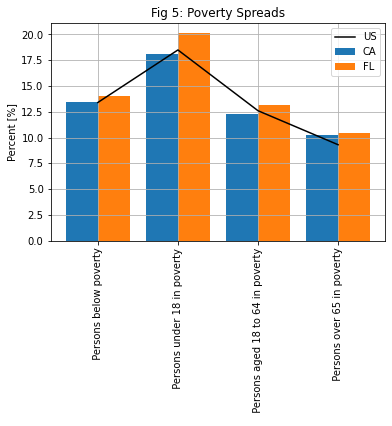

In [53]:
import matplotlib.pyplot as plt

width = 0.4
ind = np.arange(len(poverty_labels))
plt.bar(ind, cali_poverty_pct, width, label="CA")
plt.bar(ind + width, flor_poverty_pct, width, label="FL")
plt.plot(ind + width/2, us_poverty_pct, color="black", label="US")
plt.grid()
plt.xticks(ind + width/2, poverty_labels, rotation='vertical')
plt.ylabel("Percent [%]")
plt.legend(loc="best")
plt.title("Fig 5: Poverty Spreads")
plt.show()

##### Based on Figures 4 and 5, we see that a larger percentage of people in California have earnings compared to those in Florida. This appears to be correlated with relatively lower measures of poverty compared to Florida (although they are within a few percent). In addition, a larger percentage of people in Florida are receiving social security or have retirement income which is in line with the age demographics analysis. There is also a larger percentage of people in Florida who received food stamps in the last 12 months of the census which also correlates with the relatively higher poverty rates. 

#### Other aspects to look at: workers by industry, education, computer ownership and internet use